### Descrevendo um conjunto de dados

Iremos realizar algumas descrições dos dados com histogramas para verificar a quantidade de alunos que tiraram determinada nota:

In [123]:
from collections import Counter
import matplotlib.pyplot as plt
from typing import List
import math

In [124]:
nota_alunos = [10, 8, 6, 8, 7, 5, 6, 9, 10, 6]

nota_contador = Counter(nota_alunos)
nota_contador # duas pessoas tiraram 10, duas tiraram 8, duas tiraram 6, uma tirou 7.5, e assim por diante

Counter({6: 3, 10: 2, 8: 2, 7: 1, 5: 1, 9: 1})

In [125]:
valor_maximo = max(nota_alunos) # Adquire o valor máximo das notas, no caso, 10
notas_x = range(0,10) # Cria um array de notas de 0 a 10

In [126]:
quantidade_por_nota_y = [nota_contador[nota] for nota in notas_x] # Adquire a quantidade de alunos que tiraram determinada nota
quantidade_por_nota_y

[0, 0, 0, 0, 0, 1, 3, 1, 2, 1]

Text(0, 0.5, 'Quantidade de alunos')

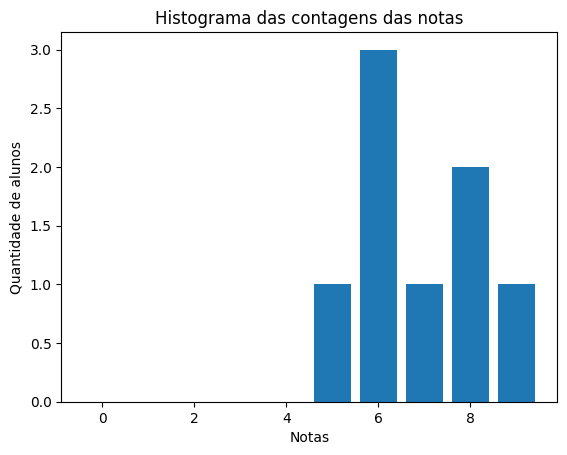

In [127]:
plt.title('Histograma das contagens das notas')
plt.bar(x=notas_x, height=quantidade_por_nota_y)
plt.xlabel('Notas')
plt.ylabel('Quantidade de alunos')

### Algebra Linear

Soma dos quadrados.

Precisamos dessa função de Algebra Linear para realizar algum dos cálculo abaixo.

In [128]:
def soma_dos_quadrados(xs: List[float]) -> float:
    quadrados_dos_xs = [x * x for x in xs]
    return sum(quadrados_dos_xs)

soma_dos_quadrados(nota_alunos)

591

### Tendências Centrais

Geralmente, queremos ter alguma noção sobre o ponto central dos dados. Para isso, costumamos usar a *média*, que consiste na soma dos dados dividido pela sua contagem.

In [129]:
def media(xs: List[float]) -> float:
    return sum(xs) / len(xs)

media(nota_alunos) # Média das notas dos alunos

7.5

Também temos a *mediana*, que corresponde ao valor do meio (quando o número de pontos de dados é **ímpar**) ou à média dos dois valores do meio (quando o número de pontos de dados é **par**).

In [130]:
# Para listas com tamanho ímpar
def _mediana_impar(xs: List[float]) -> float:
    '''Se len(xs) for ímpar, a mediana será o elemento do meio'''
    return sorted(xs)[len(xs) // 2] # Ordena a lista e em seguida, adquire o elemento do meio da lista

# Para listas com tamanho par
def _mediana_par(xs: List[float]) -> float:
    '''Se len(xs) for par, a mediana será a média dos dois elementos do meio'''
    xs_ordenado = sorted(xs)
    meio = len(xs) // 2 # Por exemplo: Se o array tem comprimento 4, o meio é 2
    return (xs_ordenado[meio - 1] + xs_ordenado[meio]) / 2

# Função pública que deve ser chamada para realizar mediana (aqui contem as verificações se a lista é par ou ímpar)
def mediana(xs: List[float]) -> float:
    return _mediana_par(xs) if len(xs) % 2 == 0 else _mediana_impar(xs)

In [131]:
# Mediana das notas:
mediana(nota_alunos)

7.5

### Dispersão

A *dispersão* expressa a medida da distribuição dos dados. Aqui, em geral:

Os valores **próximos de zero** indicam que os dados **não estão espalhados**.

Os valores **maiores** (ou algo assim) indicam dados **muito espalhados**.

Por exemplo, uma medida simples disso é a *amplitude*, a diferença entre o maior elemento e o menor.

In [132]:
# A diferença entre o maior elemento e o menor
def diferenca(xs: List[float]) -> float:
    return max(nota_alunos) - min(nota_alunos)

diferenca(nota_alunos)

5

Uma médida de dispersão mais complexa é a **variância**.

In [133]:
def subtrai_medias(xs: List[float]) -> List[float]:
    '''Traduza xs subtraindo sua média (para que o resultado tenha média 0)'''
    x_media = media(xs)
    return [x - x_media for x in xs]

def variancia(xs: List[float]) -> float:
    '''Quase o desvio quadrado médio da média'''
    comprimento_xs = len(xs)
    assert comprimento_xs >= 2, "xs precisa ter ao menos 2 elementos"

    desvios = subtrai_medias(xs)
    return soma_dos_quadrados(desvios) / comprimento_xs -1

variancia(nota_alunos) # O resultado indica que os dados não estão espalhados

1.85

**Desvio padrão**

In [134]:
def desvio_padrao(xs: List[float]) -> float:
    '''O desvio-padrão é a raiz quadrada da variância'''
    return math.sqrt(variancia(xs))

desvio_padrao(nota_alunos)

1.3601470508735443